### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
print(tienda1.columns)
print(tienda2.columns)
print(tienda3.columns)
print(tienda4.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
#Convertir la columna 'Fecha de compra' a datetime
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')


#1. Análisis de facturación
En este primer análisis, debemos calcular el ingreso total de cada tienda. Sumaremos todos los valores de la columna precio de cada conjunto de datos de la tienda para estimar los ingresos que se tienen de las tiendas para evaluar criterios.


In [ ]:
total_precio_tienda1 = tienda1['Precio'].sum()
total_precio_tienda2 = tienda2['Precio'].sum()
total_precio_tienda3 = tienda3['Precio'].sum()
total_precio_tienda4 = tienda4['Precio'].sum()

print(f"Total ingresos tienda 1: {total_precio_tienda1:,.2f}")
print(f"Total ingresos tienda 2: {total_precio_tienda2:,.2f}")
print(f"Total ingresos tienda 3: {total_precio_tienda3:,.2f}")
print(f"Total ingresos tienda 4: {total_precio_tienda4:,.2f}")
print(f"Total de ingresos de todas las tiendas: ${(total_precio_tienda1 + total_precio_tienda2 + total_precio_tienda3 + total_precio_tienda4):,.2f}")

Total ingresos tienda 1: 1,150,880,400.00
Total ingresos tienda 2: 1,116,343,500.00
Total ingresos tienda 3: 1,098,019,600.00
Total ingresos tienda 4: 1,038,375,700.00
Total de ingresos de todas las tiendas: $4,403,619,200.00


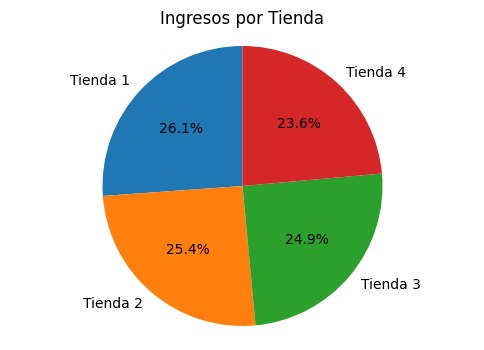

In [ ]:
# Graficando los resultados con Matplotlib
import matplotlib.pyplot as plt

# Datos de ingresos de cada tienda
ingresos = {
    'Tienda 1': total_precio_tienda1,
    'Tienda 2': total_precio_tienda2,
    'Tienda 3': total_precio_tienda3,
    'Tienda 4': total_precio_tienda4
}

nombres_tiendas = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

# Crear la gráfica de torta
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.pie(valores_ingresos, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo se vea como un círculo
plt.title('Ingresos por Tienda')
plt.show()


In [ ]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda1['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados con separador de miles
print(f"Facturación Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:,.2f}")

# Facturación total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:,.2f}")


Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


In [ ]:
from urllib.request import urlopen
import csv

# URLs corregidas (asegurando que cada tienda tenga su URL correcta)
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url_tienda1, url_tienda2, url_tienda3, url_tienda4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = sum(float(venta['Precio']) for venta in datos_tienda)

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:,.2f}")
    total_facturacion += facturacion_tienda

print(f"\nFacturación total de todas las tiendas: ${total_facturacion:,.2f}")

Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


In [ ]:
# Utilizando Pandas
import pandas as pd

# Definir las URLs correctamente
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url_tienda1, url_tienda2, url_tienda3, url_tienda4]
total_general = 0

for i, url in enumerate(urls):
    # Lectura simplificada y correcta del CSV
    df = pd.read_csv(url)

    # Conversión de precios (aunque generalmente pandas lo hace automáticamente)
    df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
    total = df['Precio'].sum()

    print(f"Total ingresos tienda {i+1}: ${total:,.2f}")
    total_general += total

print(f"\nTotal de ingresos de todas las tiendas: ${total_general:,.2f}")


Total ingresos tienda 1: $1,150,880,400.00
Total ingresos tienda 2: $1,116,343,500.00
Total ingresos tienda 3: $1,098,019,600.00
Total ingresos tienda 4: $1,038,375,700.00

Total de ingresos de todas las tiendas: $4,403,619,200.00


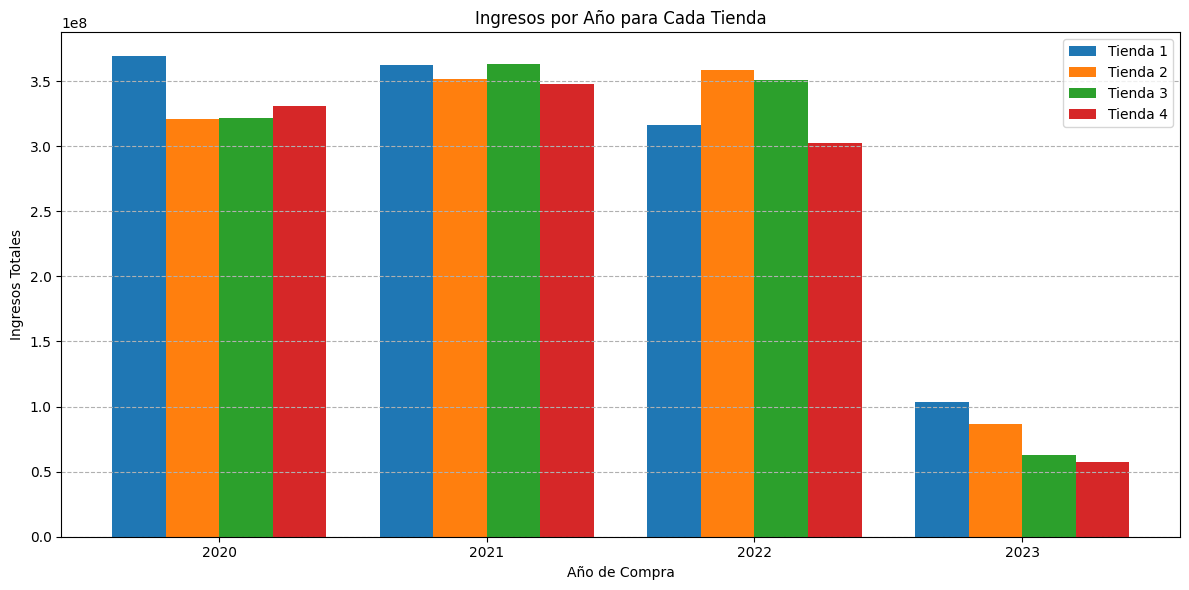

In [ ]:
# Crea una función para procesar cada tienda
def procesar_tienda(tienda, nombre_tienda):
  # Extraer el año de la fecha de compra
  tienda['Año de Compra'] = tienda['Fecha de Compra'].dt.year

  # Agrupar por año y sumar los ingresos
  ingresos_por_año = tienda.groupby('Año de Compra')['Precio'].sum()

  return ingresos_por_año

# Procesar cada tienda
ingresos_tienda1 = procesar_tienda(tienda1, 'Tienda 1')
ingresos_tienda2 = procesar_tienda(tienda2, 'Tienda 2')
ingresos_tienda3 = procesar_tienda(tienda3, 'Tienda 3')
ingresos_tienda4 = procesar_tienda(tienda4, 'Tienda 4')

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar cada tienda
plt.bar(ingresos_tienda1.index - 0.3, ingresos_tienda1.values, width=0.2, label='Tienda 1')
plt.bar(ingresos_tienda2.index - 0.1, ingresos_tienda2.values, width=0.2, label='Tienda 2')
plt.bar(ingresos_tienda3.index + 0.1, ingresos_tienda3.values, width=0.2, label='Tienda 3')
plt.bar(ingresos_tienda4.index + 0.3, ingresos_tienda4.values, width=0.2, label='Tienda 4')

plt.xlabel('Año de Compra')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos por Año para Cada Tienda')
plt.xticks(ingresos_tienda1.index) # Asegurar que los años se muestren correctamente
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()  # Evita que las etiquetas se superpongan
plt.show()

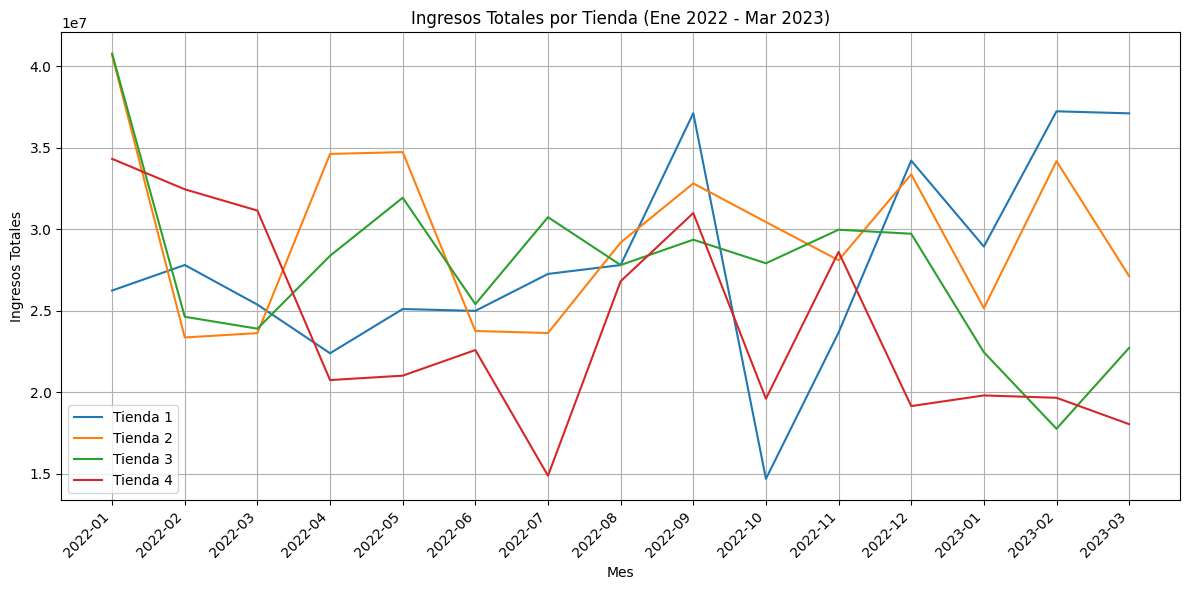

In [ ]:
# Evaluando en un periodo de tiempo.
tiendas = [tienda1, tienda2, tienda3, tienda4]
datos_combinados = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda', 'Indice'])

# Filtrar datos para el período (enero 2022 a marzo 2023)
fecha_inicio = pd.to_datetime('2022-01-01')
fecha_fin = pd.to_datetime('2023-03-31')

datos_filtrados = datos_combinados[(datos_combinados['Fecha de Compra'] >= fecha_inicio) & (datos_combinados['Fecha de Compra'] <= fecha_fin)]


# Agrupar datos por tienda y mes, luego sumar ingresos
ingresos_mensuales_por_tienda = datos_filtrados.groupby(['Tienda', datos_filtrados['Fecha de Compra'].dt.to_period('M')])['Precio'].sum().reset_index()


# Crear el gráfico
plt.figure(figsize=(12, 6))

for tienda in ingresos_mensuales_por_tienda['Tienda'].unique():
    datos_tienda = ingresos_mensuales_por_tienda[ingresos_mensuales_por_tienda['Tienda'] == tienda]
    plt.plot(datos_tienda['Fecha de Compra'].astype(str), datos_tienda['Precio'], label=tienda)

plt.xlabel('Mes')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda (Ene 2022 - Mar 2023)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría
En esta parte de nuestro análisis debemos calcular la cantidad de productos que han sido vendidos por categoría en cada tienda. Agruparemos los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más accedidas en cada tienda.

In [ ]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda
ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

# Mostrar las categorías más populares de cada tienda
print("Tienda 1 - Categorías más populares:")
print(ventas_por_categoria_tienda1.head(5))  # Mostrar las 5 categorías más populares
print("\nTienda 2 - Categorías más populares:")
print(ventas_por_categoria_tienda2.head(5))
print("\nTienda 3 - Categorías más populares:")
print(ventas_por_categoria_tienda3.head(5))
print("\nTienda 4 - Categorías más populares:")
print(ventas_por_categoria_tienda4.head(5))

Tienda 1 - Categorías más populares:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64

Tienda 2 - Categorías más populares:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64

Tienda 3 - Categorías más populares:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64

Tienda 4 - Categorías más populares:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Producto, dtype: int64


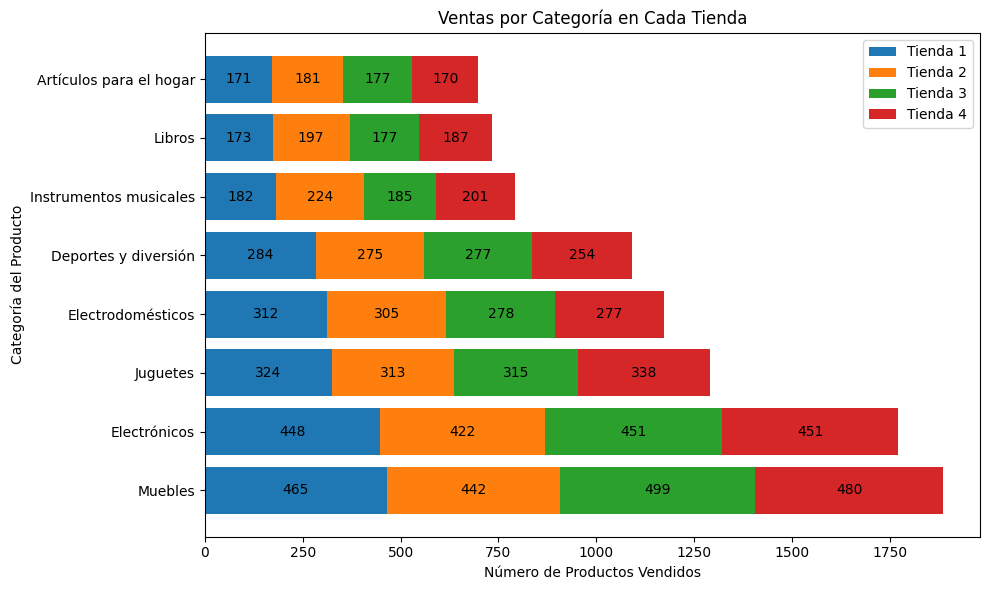

In [ ]:
# Graficando los resultados.
categorias = ventas_por_categoria_tienda1.index.tolist()
tienda1_ventas = ventas_por_categoria_tienda1.values.tolist()
tienda2_ventas = ventas_por_categoria_tienda2.values.tolist()
tienda3_ventas = ventas_por_categoria_tienda3.values.tolist()
tienda4_ventas = ventas_por_categoria_tienda4.values.tolist()


# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas horizontal
width = 0.8  # Ancho de las barras
bottom = [0] * len(categorias) #inicializacion de la barra inferior

plt.barh(categorias, tienda1_ventas, height=width, label='Tienda 1')

for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i]
  plt.text(tienda1_ventas[i] / 2, i, str(tienda1_ventas[i]), ha='center', va='center') #agrega labels para cada barra

plt.barh(categorias, tienda2_ventas, left=bottom, height=width, label='Tienda 2')
for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i] + tienda2_ventas[i]
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] / 2), i, str(tienda2_ventas[i]), ha='center', va='center')

plt.barh(categorias, tienda3_ventas, left=bottom, height=width, label='Tienda 3')
for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i]
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i] / 2), i, str(tienda3_ventas[i]), ha='center', va='center')

plt.barh(categorias, tienda4_ventas, left=bottom, height=width, label='Tienda 4')
for i in range(len(categorias)):
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i] + tienda4_ventas[i] / 2), i, str(tienda4_ventas[i]), ha='center', va='center')



# Agregar etiquetas y título
plt.xlabel('Número de Productos Vendidos')
plt.ylabel('Categoría del Producto')
plt.title('Ventas por Categoría en Cada Tienda')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

## Otra forma de desarrollo

In [ ]:
# Nos enfocaremos en el analisis de las ventas por categorias
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categoría
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:,.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:,.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:,.2f}")


Ventas por categoría en Tienda 1:
  Electrónicos: $1,290,390,700.00
  Muebles: $582,928,200.00
  Juguetes: $49,062,800.00
  Electrodomésticos: $1,032,375,600.00
  Artículos para el hogar: $38,316,800.00
  Deportes y diversión: $126,883,700.00
  Libros: $25,769,400.00
  Instrumentos musicales: $276,990,500.00

Ventas por categoría en Tienda 2:
  Muebles: $527,332,100.00
  Instrumentos musicales: $294,448,700.00
  Deportes y diversión: $81,660,600.00
  Electrónicos: $1,286,643,600.00
  Artículos para el hogar: $42,739,700.00
  Juguetes: $46,721,200.00
  Electrodomésticos: $1,026,226,300.00
  Libros: $31,417,000.00

Ventas por categoría en Tienda 3:
  Electrodomésticos: $1,081,380,800.00
  Muebles: $555,092,500.00
  Instrumentos musicales: $250,336,000.00
  Deportes y diversión: $123,399,200.00
  Electrónicos: $1,101,334,500.00
  Juguetes: $61,190,400.00
  Artículos para el hogar: $44,724,600.00
  Libros: $26,358,900.00

Ventas por categoría en Tienda 4:
  Electrodomésticos: $879,089,600

In [ ]:
# Función para calcular y mostrar las ventas por categoría de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en Tienda {numero}:")
    for categoria, monto in ventas.items():
        print(f"  {categoria}: ${monto:,.2f}")

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda1, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
  Artículos para el hogar: $12,698,400.00
  Deportes y diversión: $39,290,000.00
  Electrodomésticos: $363,685,200.00
  Electrónicos: $429,493,500.00
  Instrumentos musicales: $91,299,000.00
  Juguetes: $17,995,700.00
  Libros: $8,784,900.00
  Muebles: $187,633,700.00

Ventas por categoría en Tienda 2:
  Artículos para el hogar: $14,746,900.00
  Deportes y diversión: $34,744,500.00
  Electrodomésticos: $348,567,800.00
  Electrónicos: $410,831,100.00
  Instrumentos musicales: $104,990,300.00
  Juguetes: $15,945,400.00
  Libros: $10,091,200.00
  Muebles: $176,426,300.00

Ventas por categoría en Tienda 3:
  Artículos para el hogar: $15,060,000.00
  Deportes y diversión: $35,593,100.00
  Electrodomésticos: $329,237,900.00
  Electrónicos: $410,775,800.00
  Instrumentos musicales: $77,380,900.00
  Juguetes: $19,401,100.00
  Libros: $9,498,700.00
  Muebles: $201,072,100.00

Ventas por categoría en Tienda 4:
  Artículos para el hogar: $15,074,500.00
  Deporte

# 3. Calificación promedio de la tienda
En este paso, calcularemos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.


In [ ]:
# Calcular la calificación promedio de cada tienda de manera simplificada
promedio_calificacion_tienda1 = tienda1['Calificación'].mean()
promedio_calificacion_tienda2 = tienda2['Calificación'].mean()
promedio_calificacion_tienda3 = tienda3['Calificación'].mean()
promedio_calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {promedio_calificacion_tienda1:.2f}")
print(f"Calificación promedio tienda 2: {promedio_calificacion_tienda2:.2f}")
print(f"Calificación promedio tienda 3: {promedio_calificacion_tienda3:.2f}")
print(f"Calificación promedio tienda 4: {promedio_calificacion_tienda4:.2f}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


In [ ]:
# Optimizando el codigo anterior
def calificacion_promedio(tienda, numero):
    try:
        # Intentamos calcular el promedio de calificaciones
        promedio = tienda['Calificación'].mean()
        print(f"Calificación promedio en Tienda {numero}: {promedio:.2f}")

    except KeyError:
        # Maneja el caso donde la columna 'Calificación' no existe en el DataFrame
        print(f"Error en Tienda {numero}: No se encontró la columna 'Calificación'")

    except Exception as e:
        # Captura cualquier otro error inesperado (ej: datos no numéricos, DataFrame vacío, etc.)
        print(f"Error inesperado en Tienda {numero}: {str(e)}")

# Mostrar resultados para cada tienda
calificacion_promedio(tienda1, 1)
calificacion_promedio(tienda2, 2)
calificacion_promedio(tienda3, 3)
calificacion_promedio(tienda4, 4)

Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


In [ ]:
# Aplicando python nativo para obtener los resultados.
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


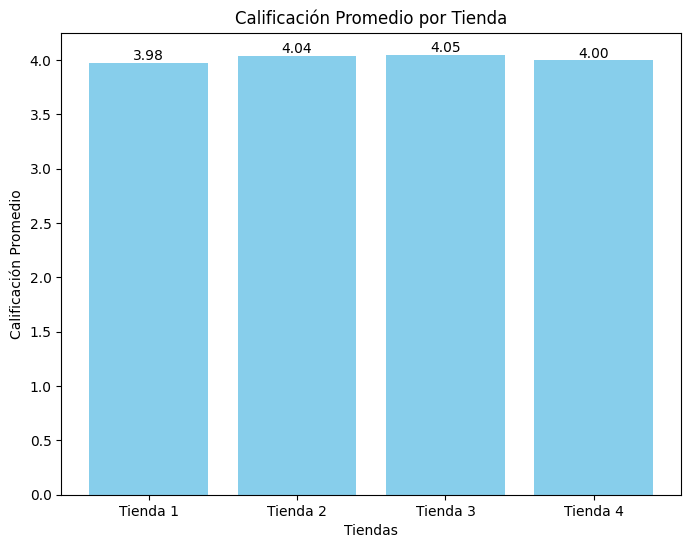

In [ ]:
# Con datos cotejados y ya comprobados, vamos a graficar la informacion obtenida
# Datos de calificación promedio de cada tienda (reemplaza con tus valores)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [promedio_calificacion_tienda1, promedio_calificacion_tienda2, promedio_calificacion_tienda3, promedio_calificacion_tienda4]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(tiendas, calificaciones, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')

# Agregar los valores de calificación encima de cada barra
for i, v in enumerate(calificaciones):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


# 4. Productos más y menos vendidos
En esta apartado, identificaremos los productos más vendidos y menos vendidos en cada una de las tiendas.
Se debe visualizar los resultados de que productos destacaron en ventas en cada tienda.

In [ ]:
# Función para encontrar los productos más y menos vendidos
def productos_mas_menos_vendidos(df, tienda_num):
    ventas_por_producto = df.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    mas_vendidos = ventas_por_producto.head(5)
    menos_vendidos = ventas_por_producto.tail(5)
    print(f"\nTienda {tienda_num} - Productos más vendidos:")
    print(mas_vendidos)
    print(f"\nTienda {tienda_num} - Productos menos vendidos:")
    print(menos_vendidos)


# Llamar a la función para cada tienda
productos_mas_menos_vendidos(tienda1, 1)
productos_mas_menos_vendidos(tienda2, 2)
productos_mas_menos_vendidos(tienda3, 3)
productos_mas_menos_vendidos(tienda4, 4)


Tienda 1 - Productos más vendidos:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Precio, dtype: int64

Tienda 1 - Productos menos vendidos:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Precio, dtype: int64

Tienda 2 - Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Precio, dtype: int64

Tienda 2 - Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Precio, dtype: int64

Tienda 3 - Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Pr

In [ ]:
from collections import defaultdict
import csv
from urllib.request import urlopen

# Tus URLs originales (Collab no las reconocia si no se vuelve a declarar)
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Función modificada para usar con tus URLs
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        ingreso_por_producto[producto] += precio

    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:,.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:,.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142,150,200.00
  Refrigerador - Ingresos: $112,143,300.00
  Iphone 15 - Ingresos: $97,902,200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696,900.00
  Dinosaurio Rex - Ingresos: $688,900.00
  Cuerda para saltar - Ingresos: $652,800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113,225,800.00
  TV LED UHD 4K - Ingresos: $103,375,000.00
  Refrigerador - Ingresos: $97,632,500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856,900.00
  Dinosaurio Rex - Ingresos: $770,300.00
  Cubo mágico 8x8 - Ingresos: $643,600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99,889,700.00
  TV LED UHD 4K - Ingresos: $96,669,100.00
  Iphone 15 - Ingresos: $93,225,700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853,

In [ ]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista única de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In


=== Tienda 1 ===

Top 5 por frecuencia de ventas:
            Producto  Frecuencia
1            Armario          60
48     TV LED UHD 4K          60
33        Microondas          60
40  Secadora de ropa          58
32     Mesa de noche          56

Top 5 por ingresos generados:
            Producto  Ingresos_Totales
48     TV LED UHD 4K    142,150,200.00
39      Refrigerador    112,143,300.00
25         Iphone 15     97,902,200.00
45          Smart TV     67,452,100.00
28  Lavadora de ropa     65,783,600.00

Bottom 5 por frecuencia de ventas:
                       Producto  Frecuencia
4     Auriculares con micrófono          33
13                 Celular ABXY          33
37              Olla de presión          35
38                    Pandereta          36
14  Ciencia de datos con Python          39

Bottom 5 por ingresos generados:
              Producto  Ingresos_Totales
17  Cuerda para saltar        652,800.00
19      Dinosaurio Rex        688,900.00
16     Cubo mágico 8x8       

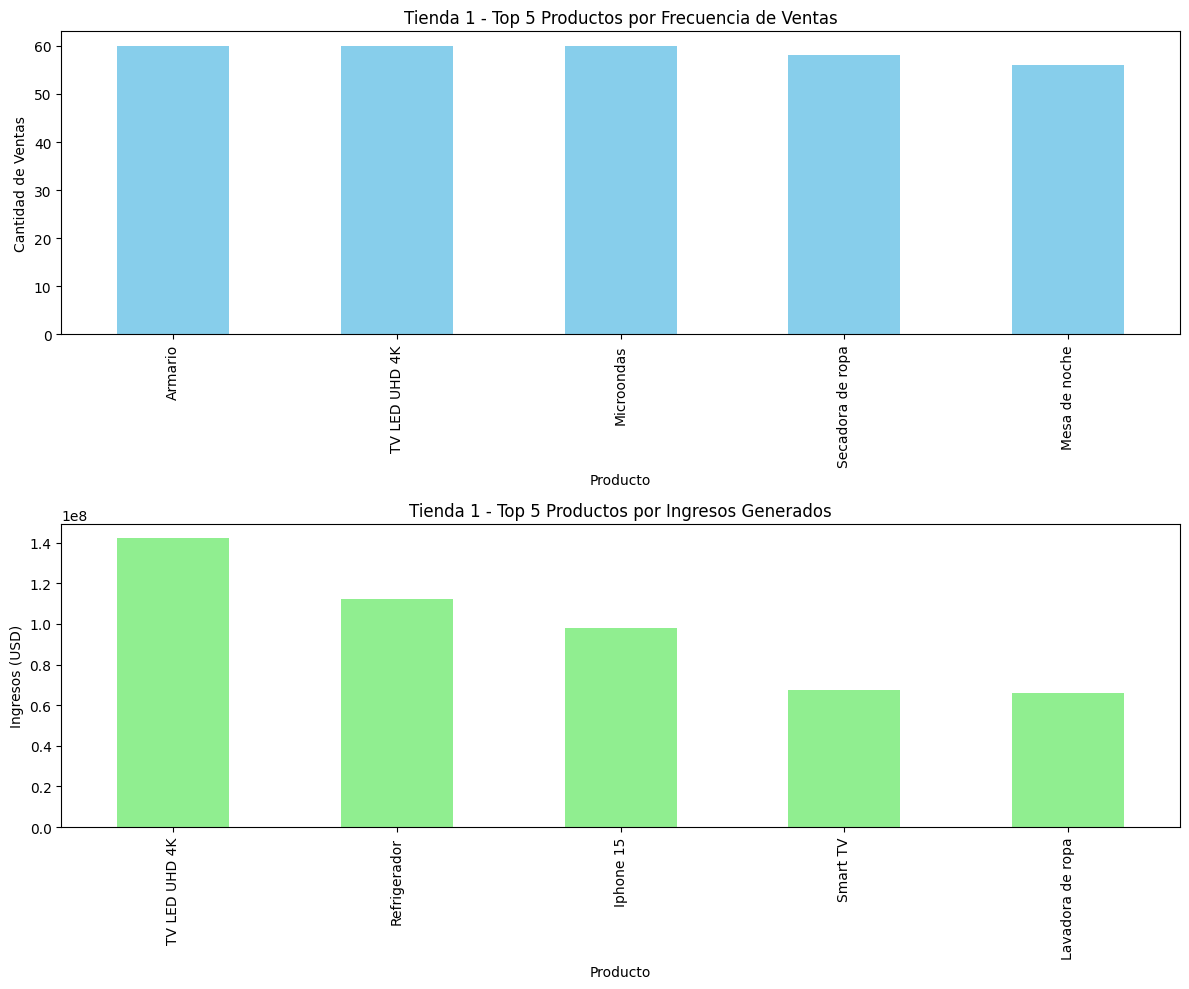


=== Tienda 2 ===

Top 5 por frecuencia de ventas:
                     Producto  Frecuencia
24  Iniciando en programación          65
33                 Microondas          62
7                     Batería          61
38                  Pandereta          58
21          Guitarra acústica          58

Top 5 por ingresos generados:
            Producto  Ingresos_Totales
25         Iphone 15    113,225,800.00
48     TV LED UHD 4K    103,375,000.00
39      Refrigerador     97,632,500.00
28  Lavadora de ropa     66,762,300.00
45          Smart TV     61,142,000.00

Bottom 5 por frecuencia de ventas:
           Producto  Frecuencia
26    Juego de mesa          32
23        Impresora          34
31  Mesa de comedor          34
44           Sillón          35
3       Auriculares          37

Bottom 5 por ingresos generados:
              Producto  Ingresos_Totales
16     Cubo mágico 8x8        643,600.00
19      Dinosaurio Rex        770,300.00
17  Cuerda para saltar        856,900.00
0    A

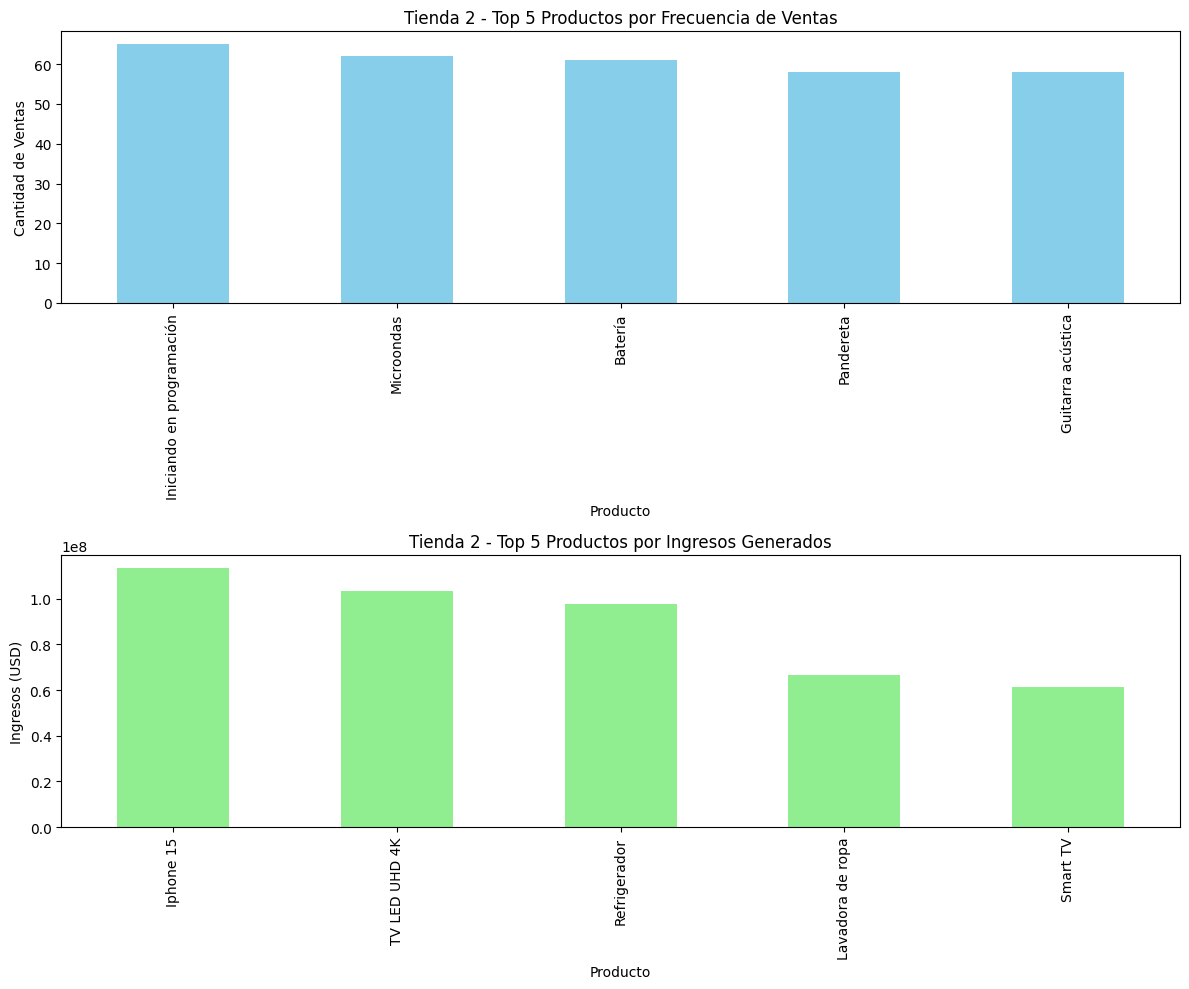


=== Tienda 3 ===

Top 5 por frecuencia de ventas:
           Producto  Frecuencia
27    Kit de bancas          57
31  Mesa de comedor          56
11        Cama king          56
41     Set de ollas          55
32    Mesa de noche          55

Top 5 por ingresos generados:
         Producto  Ingresos_Totales
39   Refrigerador     99,889,700.00
48  TV LED UHD 4K     96,669,100.00
25      Iphone 15     93,225,700.00
45       Smart TV     78,837,300.00
29   Lavavajillas     64,364,800.00

Bottom 5 por frecuencia de ventas:
                   Producto  Frecuencia
9   Bloques de construcción          35
42             Set de vasos          36
34                  Mochila          36
33               Microondas          36
50             Vaso térmico          38

Bottom 5 por ingresos generados:
                   Producto  Ingresos_Totales
16          Cubo mágico 8x8        640,400.00
19           Dinosaurio Rex        795,600.00
17       Cuerda para saltar        853,800.00
42             S

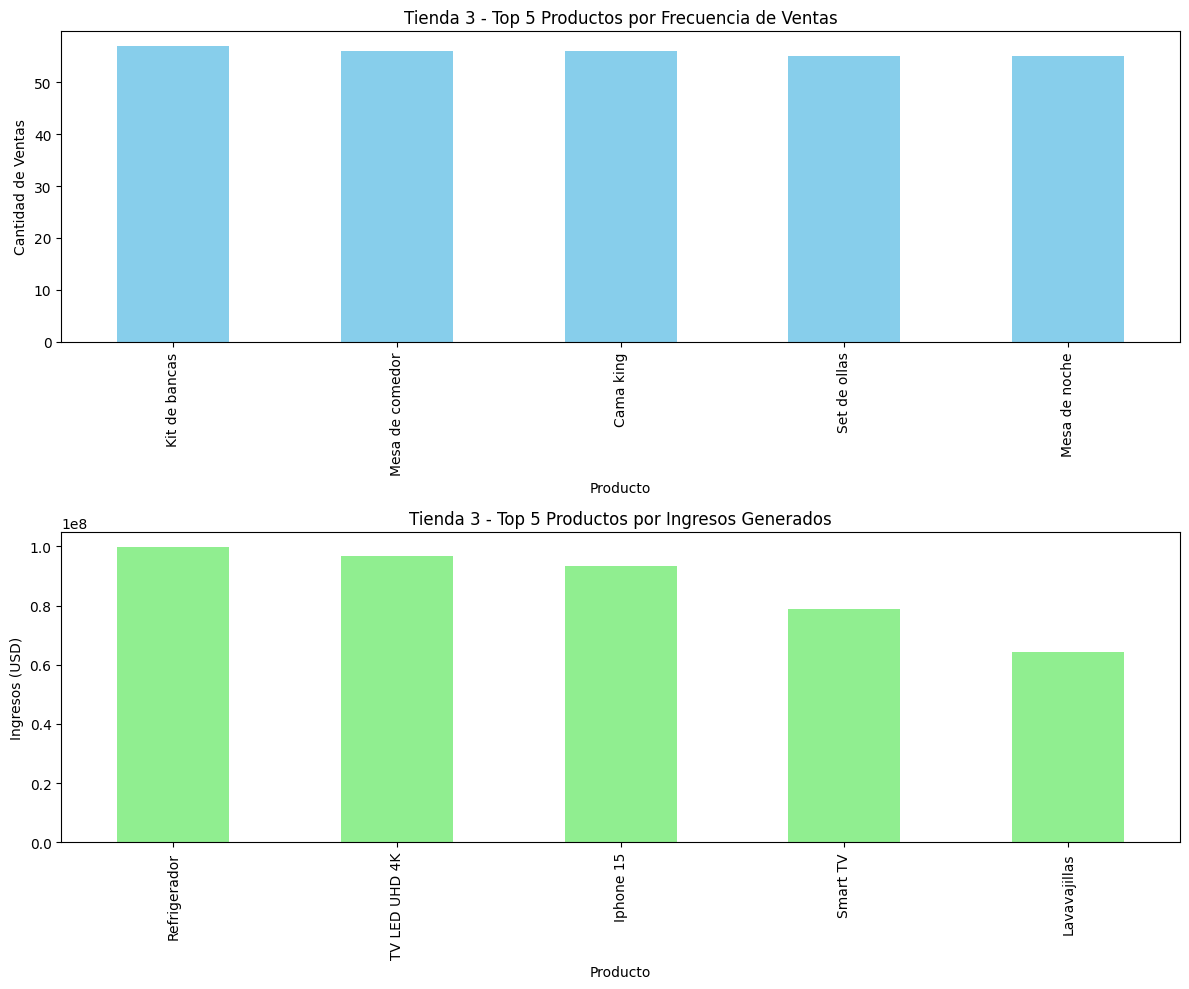


=== Tienda 4 ===

Top 5 por frecuencia de ventas:
                     Producto  Frecuencia
10                   Cama box          62
15                 Cubertería          59
11                  Cama king          56
18    Dashboards con Power BI          56
12  Carrito de control remoto          55

Top 5 por ingresos generados:
         Producto  Ingresos_Totales
25      Iphone 15     96,697,500.00
48  TV LED UHD 4K     90,295,300.00
45       Smart TV     82,790,400.00
39   Refrigerador     75,271,900.00
49    Tablet ABXY     56,723,100.00

Bottom 5 por frecuencia de ventas:
                       Producto  Frecuencia
22           Guitarra eléctrica          33
1                       Armario          34
21            Guitarra acústica          37
14  Ciencia de datos con Python          38
28             Lavadora de ropa          38

Bottom 5 por ingresos generados:
              Producto  Ingresos_Totales
17  Cuerda para saltar        704,800.00
16     Cubo mágico 8x8        748,

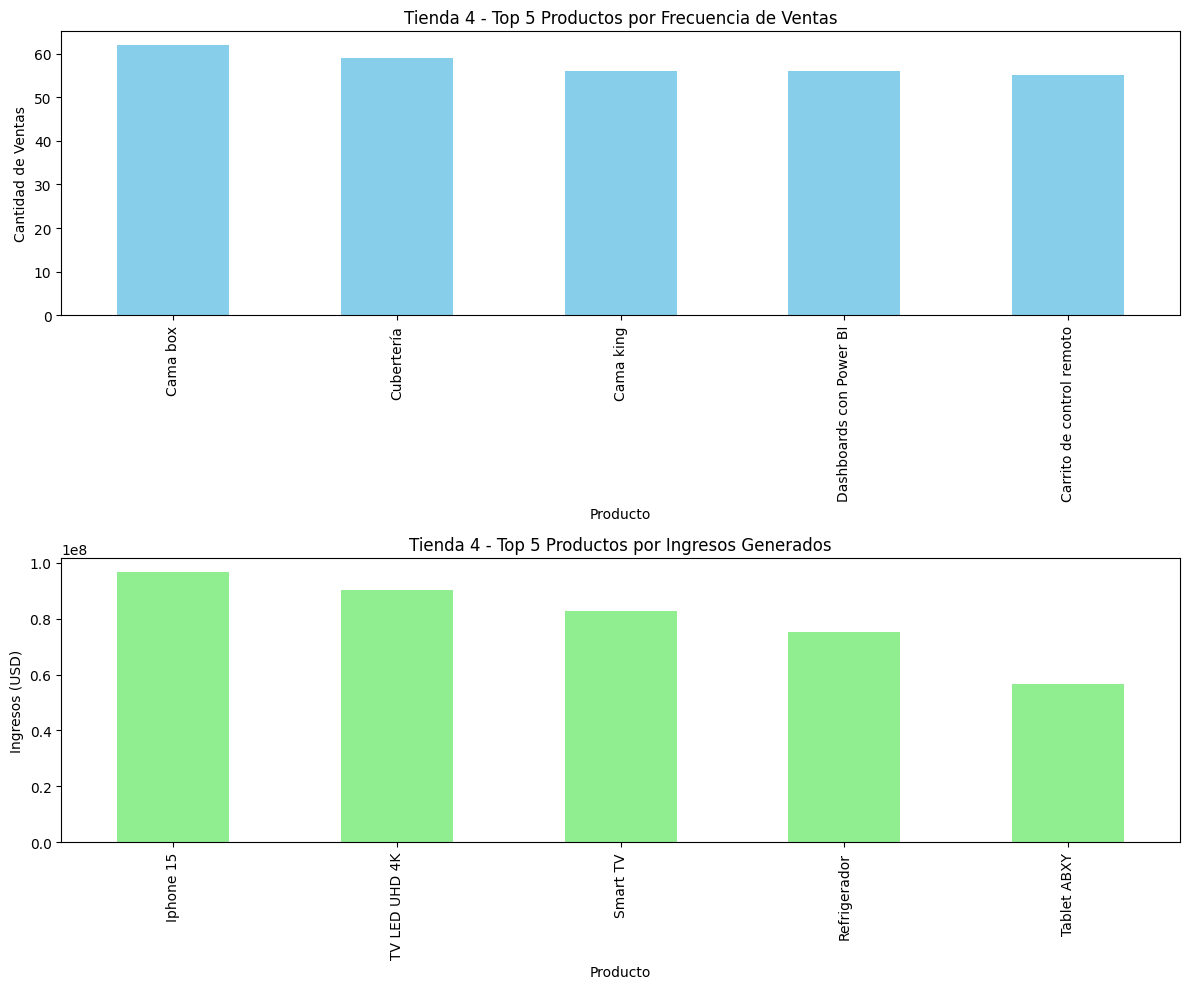

In [ ]:
# El primer criterio considera la cantidad de productos mas y menos vendidos en numeros, el segundo criterio evalua por el montos totales.
# Ahora implementaremos ambas formas para evaluar de la mejor forma la decision
import pandas as pd
import matplotlib.pyplot as plt

def analisis_ventas_completo(df, tienda_num):
    # Calculamos ambas métricas
    ventas = df.groupby('Producto')['Precio'].agg([
        ('Frecuencia', 'count'),
        ('Ingresos_Totales', 'sum')
    ]).reset_index()

    # Ordenamos por frecuencia
    top_frecuencia = ventas.sort_values('Frecuencia', ascending=False).head(5)
    bottom_frecuencia = ventas.sort_values('Frecuencia').head(5)

    # Ordenamos por ingresos
    top_ingresos = ventas.sort_values('Ingresos_Totales', ascending=False).head(5)
    bottom_ingresos = ventas.sort_values('Ingresos_Totales').head(5)

    # Formateamos números
    pd.options.display.float_format = '{:,.2f}'.format

    # Imprimimos resultados
    print(f"\n=== Tienda {tienda_num} ===")
    print("\nTop 5 por frecuencia de ventas:")
    print(top_frecuencia[['Producto', 'Frecuencia']])

    print("\nTop 5 por ingresos generados:")
    print(top_ingresos[['Producto', 'Ingresos_Totales']])

    print("\nBottom 5 por frecuencia de ventas:")
    print(bottom_frecuencia[['Producto', 'Frecuencia']])

    print("\nBottom 5 por ingresos generados:")
    print(bottom_ingresos[['Producto', 'Ingresos_Totales']])

    # Visualizaciones
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))

    # Gráfico de frecuencia
    top_frecuencia.set_index('Producto')['Frecuencia'].plot(
        kind='bar',
        title=f'Tienda {tienda_num} - Top 5 Productos por Frecuencia de Ventas',
        ax=ax[0],
        color='skyblue'
    )
    ax[0].set_ylabel('Cantidad de Ventas')

    # Gráfico de ingresos
    top_ingresos.set_index('Producto')['Ingresos_Totales'].plot(
        kind='bar',
        title=f'Tienda {tienda_num} - Top 5 Productos por Ingresos Generados',
        ax=ax[1],
        color='lightgreen'
    )
    ax[1].set_ylabel('Ingresos (USD)')

    plt.tight_layout()
    plt.show()

# Usando tus DataFrames existentes
analisis_ventas_completo(tienda1, 1)
analisis_ventas_completo(tienda2, 2)
analisis_ventas_completo(tienda3, 3)
analisis_ventas_completo(tienda4, 4)

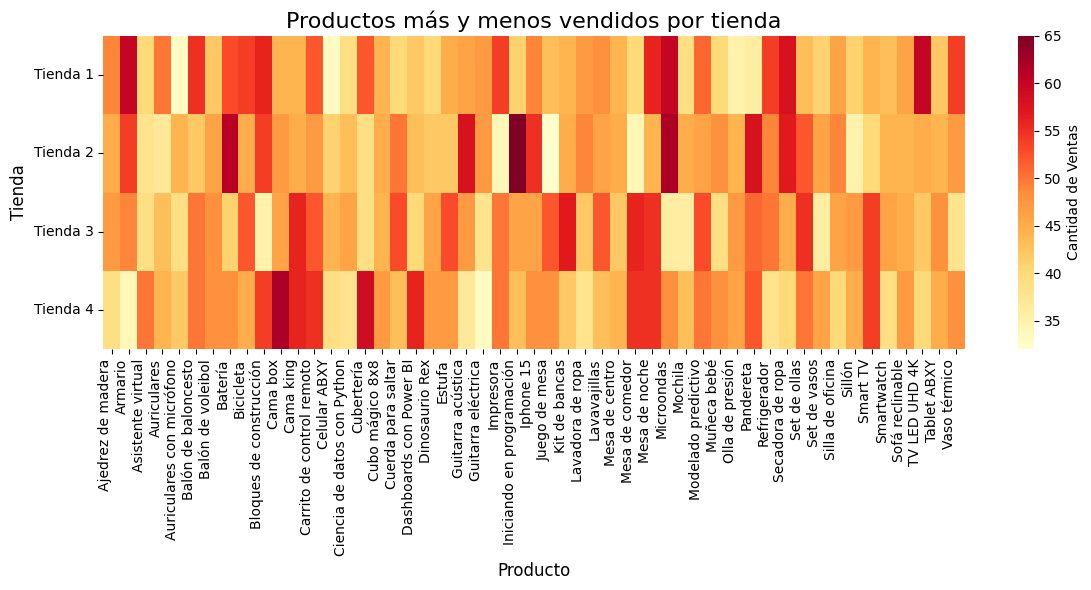

In [68]:
# Gráfico para categorizar todos los productos y tiendas al mismo tiempo.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Función para preparar los datos para el heatmap
def preparar_datos_heatmap(tienda, num_tienda):
    ventas_por_producto = tienda.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    productos = ventas_por_producto.index.tolist()
    ventas = ventas_por_producto.values.tolist()

    datos_heatmap = {'Producto': productos, 'Ventas': ventas}
    df_heatmap = pd.DataFrame(datos_heatmap)
    df_heatmap['Tienda'] = f'Tienda {num_tienda}'
    return df_heatmap

# Preparar los datos para cada tienda
df_heatmap_tienda1 = preparar_datos_heatmap(tienda1, 1)
df_heatmap_tienda2 = preparar_datos_heatmap(tienda2, 2)
df_heatmap_tienda3 = preparar_datos_heatmap(tienda3, 3)
df_heatmap_tienda4 = preparar_datos_heatmap(tienda4, 4)

# Combinar los datos de las cuatro tiendas
df_heatmap_combinado = pd.concat([df_heatmap_tienda1, df_heatmap_tienda2, df_heatmap_tienda3, df_heatmap_tienda4])

# Crear la tabla dinámica para el heatmap
heatmap_data = df_heatmap_combinado.pivot_table(index='Tienda', columns='Producto', values='Ventas', aggfunc='sum')

# Crear el heatmap con escala corregida
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=False,
    cmap='YlOrRd',  # Escala original Yellow-Orange-Red
    cbar_kws={'label': 'Cantidad de Ventas'}
)
plt.title('Productos más y menos vendidos por tienda', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda
En este paso calcularemos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


In [ ]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


Costo de envío promedio tienda 1: $26.018,61
Costo de envío promedio tienda 2: $25.216,24
Costo de envío promedio tienda 3: $24.805,68
Costo de envío promedio tienda 4: $23.459,46


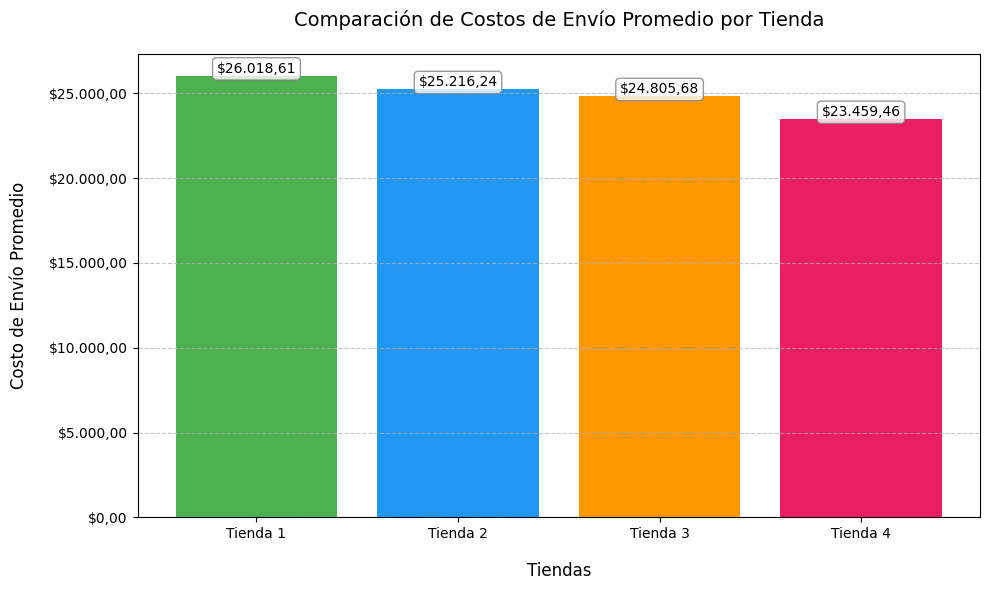

In [ ]:
# Calcular promedios con formato monetario
def formato_monetario(valor):
    return f"${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

costo_envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Imprimir con formato
print(f"Costo de envío promedio tienda 1: {formato_monetario(costo_envio_promedio_tienda1)}")
print(f"Costo de envío promedio tienda 2: {formato_monetario(costo_envio_promedio_tienda2)}")
print(f"Costo de envío promedio tienda 3: {formato_monetario(costo_envio_promedio_tienda3)}")
print(f"Costo de envío promedio tienda 4: {formato_monetario(costo_envio_promedio_tienda4)}")

# Datos para gráfica
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [costo_envio_promedio_tienda1,
                costo_envio_promedio_tienda2,
                costo_envio_promedio_tienda3,
                costo_envio_promedio_tienda4]

# Configurar gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, costos_envio, color=['#4CAF50', '#2196F3', '#FF9800', '#E91E63'])

# Personalizar ejes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: formato_monetario(x)))
plt.xlabel('Tiendas', fontsize=12, labelpad=15)
plt.ylabel('Costo de Envío Promedio', fontsize=12, labelpad=15)
plt.title('Comparación de Costos de Envío Promedio por Tienda', fontsize=14, pad=20)

# Añadir valores en las barras
for bar, costo in zip(bars, costos_envio):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             formato_monetario(costo),
             ha='center', va='bottom',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.3'))

# Mejorar estilo general
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# EXTRA

<ipython-input-60-21a022c35bb1>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(format_number),


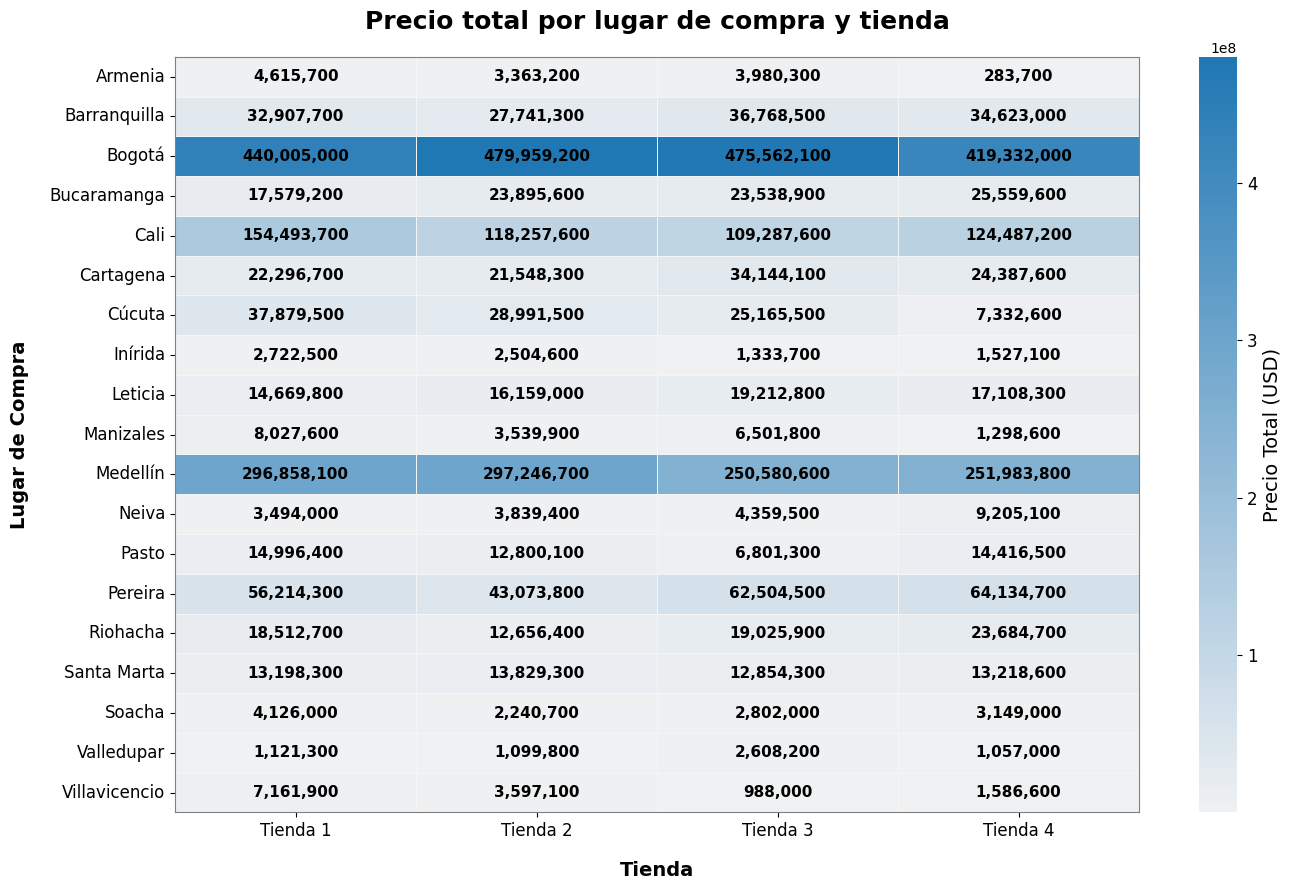

In [ ]:
plt.figure(figsize=(14, 9))

# Creamos una paleta personalizada de claros a oscuros
custom_cmap = sns.light_palette("#1f77b4", as_cmap=True)  # Azul claro como base

ax = sns.heatmap(
    heatmap_data,
    annot=heatmap_data.applymap(format_number),
    fmt="",
    cmap=custom_cmap,  # Paleta personalizada
    linewidths=.5,
    linecolor='whitesmoke',
    annot_kws={
        'size': 11,
        'color': 'black',  # Texto en negro
        'weight': 'semibold'  # Grosor de fuente
    },
    cbar_kws={'label': 'Precio Total (USD)'}
)

# Configuración de ejes
plt.title('Precio total por lugar de compra y tienda', fontsize=18, pad=20, weight='bold')
plt.xlabel('Tienda', fontsize=14, labelpad=15, weight='semibold')
plt.ylabel('Lugar de Compra', fontsize=14, labelpad=15, weight='semibold')

# Alineación horizontal de etiquetas
plt.xticks(
    rotation=0,  # Sin rotación
    ha='center',  # Centrado horizontal
    fontsize=12
)
plt.yticks(
    rotation=0,
    fontsize=12
)

# Ajuste de colores
ax.set_facecolor('white')  # Fondo blanco puro

# Barra de color mejorada
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.yaxis.label.set_size(14)
cbar.outline.set_edgecolor('gray')

# Añadir líneas de referencia
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_edgecolor('gray')

plt.tight_layout()
plt.show()



---



# INFORME FINAL
## Introducción
El presente informe tiene como objetivo apoyar en labores de consultoria para que un cliente pueda identificar cuál de las cuatro sucursales que posee en la actualidad, tras ser analizadas represente la mejor oportunidad comercial para vender sus productos.
Para este análisis se revisaron los siguientes factores:

*   Ingresos totales por cada tienda.
*   Categorías de productos más y menos vendidos.
*   Calificaciones de los clientes para cada tienda.
*   Costos de envío de productos.


# 1.- Ingresos

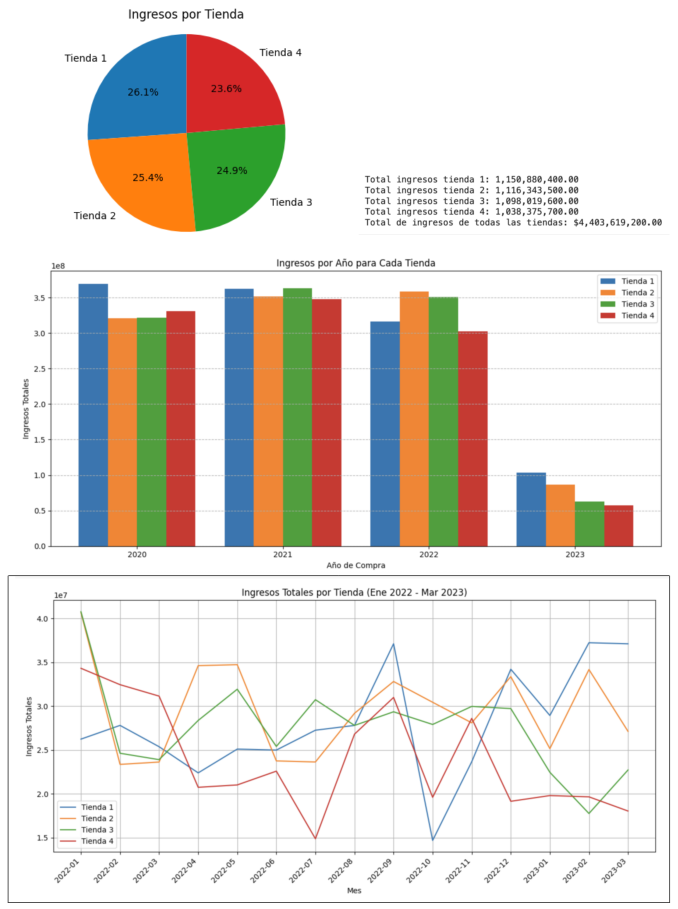

Tras analizar los ingresos totales de cada tienda, se observa que la Tienda 1 ha generado la mayor cantidad de ingresos con \$1,150,880,400, seguida por la Tienda 2 con \$1,116,343,500, la Tienda 3 con \$1,098,019,600 y finalmente la Tienda 4 con \$1,038,375,700.

La Tienda 4 es la menos lucrativa de las cuatro. Desde el año 2022, se ha presentado una reducción de los ingresos, siendo los meses más críticos julio, octubre y diciembre de 2022, así como lo recorrido del año 2023.

**Evaluación**  
La Tienda 1 es el modelo a replicar, mientras que la Tienda 4 requiere intervención urgente. La caída en 2023 sugiere revisar estrategias comerciales y alinear planes con ciclos económicos regionales.

*Nota Analítica*: Validar si los datos de 2023 incluyen eventos atípicos (ej: huelgas, cambios regulatorios).

# 2.- CATEGORÍAS DE PRODUCTOS MÁS Y MENOS VENDIDAS:

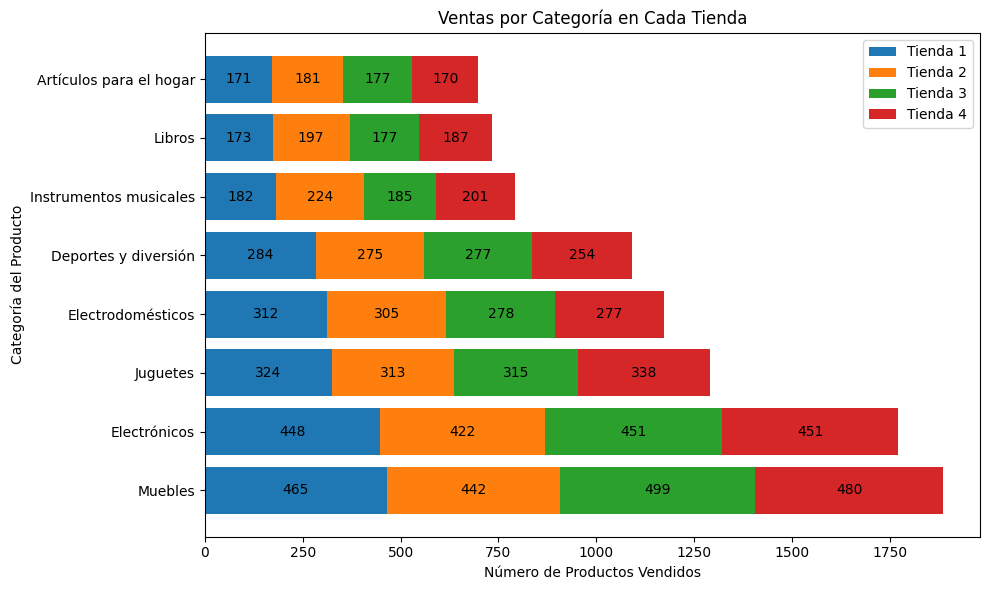

Los datos revelan una distribución heterogénea de ventas unitarias entre categorías y puntos de venta, con los siguientes hallazgos cuantificables:

* En todas las tiendas, "Muebles" y "Electrónicos" son evidentemente las categorías más populares en términos de unidades vendidas.
* "Juguetes", muestra cierta variabilidad entre tiendas, siendo más alta en la Tienda 4 (338 unidades) y más baja en la Tienda 2 (313 unidades).
* "Electrodomésticos" y "Deportes y diversión" presentan fluctuaciones moderadas, con diferencias significativas entre las tiendas en algunos casos.
* Aunque las diferencias de ventas no son abismales, la Tienda 2 tiene valores más bajos en todas las categorías, lo que sugiere un problema generalizado y no solo en una línea de productos.



# 3.- CALIFICACIONES PROMEDIO DE LOS CLIENTES:

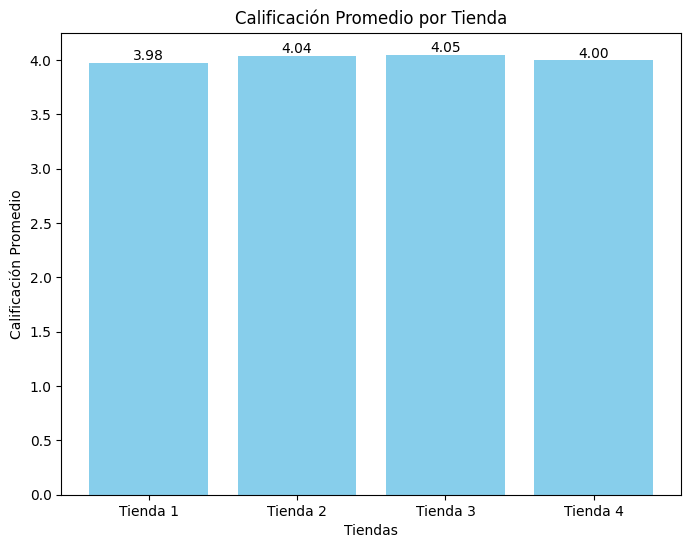

**Análisis**
* Tienda 2 y Tienda 3 tienen las mejores calificaciones, lo cual es coherente con una estrategia centrada en mejor atención, experiencia o calidad del producto.
* En el caso de la Tienda 2, esto refuerza la idea de que aunque vende menos unidades, está bien posicionada en calidad y valor percibido.
* Tienda 4 tiene la segunda menor calificación (3.99) y el ingreso por unidad más bajo, lo que puede indicar una percepción de menor calidad o insatisfacción general, que se refleja tanto en calificación como en ingresos.
* Tienda 1 tiene buen volumen e ingresos, pero la menor calificación (3.98). Esto puede ser una señal de alerta: está vendiendo mucho, pero quizá está comenzando a afectar la experiencia del cliente.

# 4.- PRODUCTOS MÁS Y MENOS VENDIDOS:

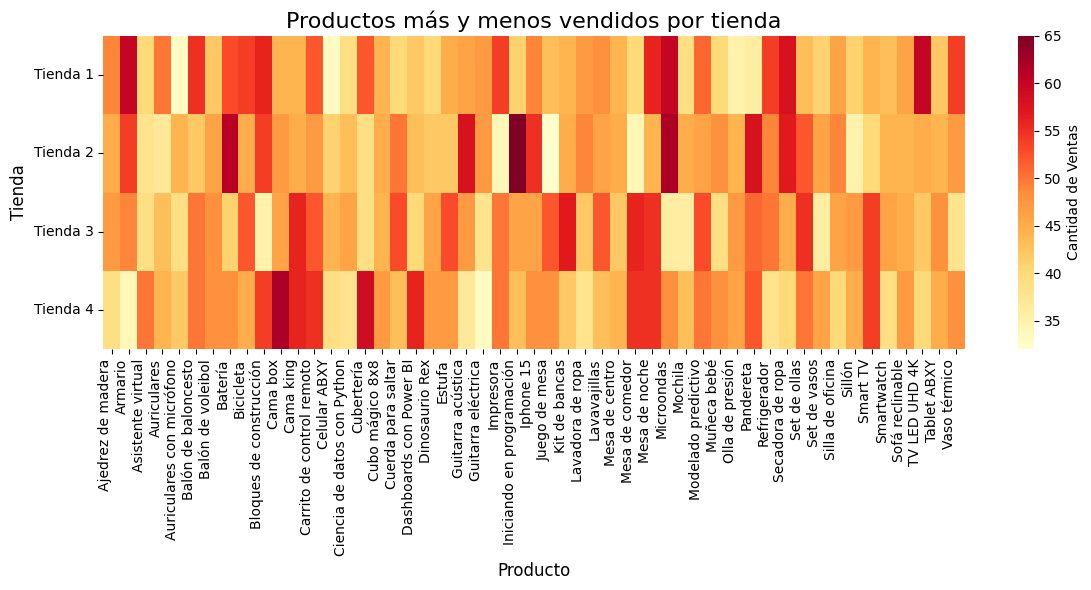

🏪 **Tienda 1**  
* **Más vendidos:** productos tradicionales y esenciales (muebles y electrodomésticos): Armario, TV LED, Microondas, Secadora de ropa.  
* **Menos vendidos:** productos de bajo ticket o nicho: Mochila, Pandereta, Celular ABXY.  
* **Perfil:** tienda enfocada en productos grandes y funcionales. La menor venta de tecnología personal y juguetes podría estar afectando la diversidad.

---

🏪 **Tienda 2**  
* **Más vendidos:** productos de educación, cocina y entretenimiento: Iniciando en programación, Microondas, Pandereta, Guitarra acústica.  
* **Menos vendidos:** muebles y tecnología: Sillón, Impresora, Mesa de comedor.  
* **Perfil:** esta tienda parece atraer más a un público joven o estudiantes, pero no logra rotar bien los productos grandes como muebles, lo que puede limitar el ticket promedio.

---

🏪 **Tienda 3**  
* **Más vendidos:** muebles de alta gama: Kit de bancas, Mesa de comedor, Cama king.  
* **Menos vendidos:** artículos más pequeños o de nicho: Microondas, Bloques de construcción.  
* **Perfil:** orientada a hogar y cocina, con rotación sólida de productos grandes. Pero los artículos pequeños no se mueven tan bien, lo que indica menor atención o visibilidad de ese segmento.

---

🏪 **Tienda 4**  
* **Más vendidos:** cama, cocina, juguetes y cursos digitales (Power BI).  
* **Menos vendidos:** cursos de nicho (Ciencia de datos con Python), Refrigerador, Armario, Guitarras.  
* **Perfil:** esta tienda mezcla productos físicos con digitales. Aunque algunos cursos se venden bien, otros no rotan, y los muebles grandes parecen estancados.

# 5.- COSTE DE ENVÍO PROMEDIO:

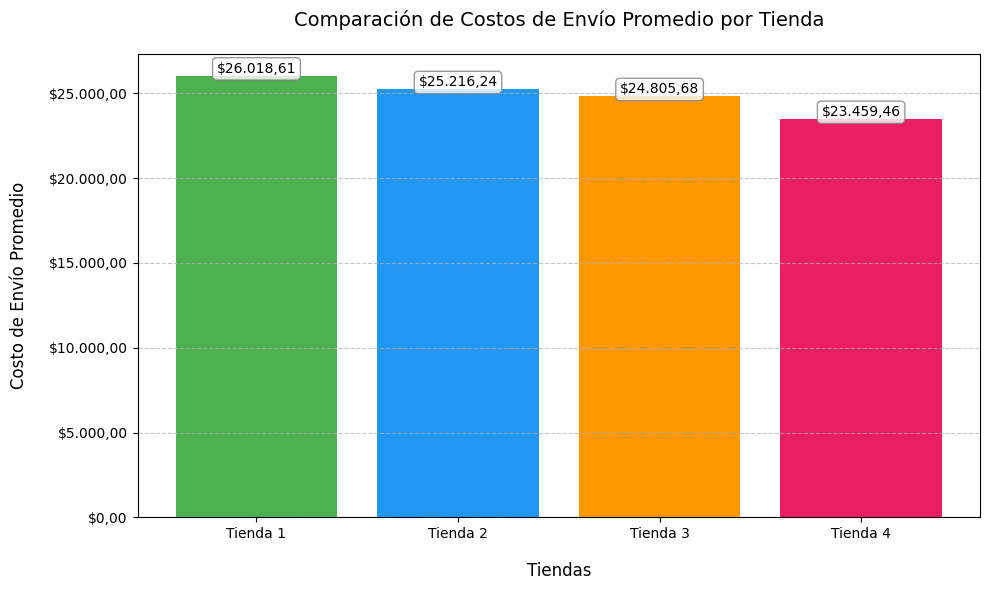

**Análisis**
* Tienda 1 es la menos eficiente en costos logísticos, al tener el costo de envío promedio más alto de todas.

* Tienda 4 sobresale por su eficiencia logística, lo cual puede representar una ventaja competitiva en términos de rentabilidad neta.

# 6.- EXTRA

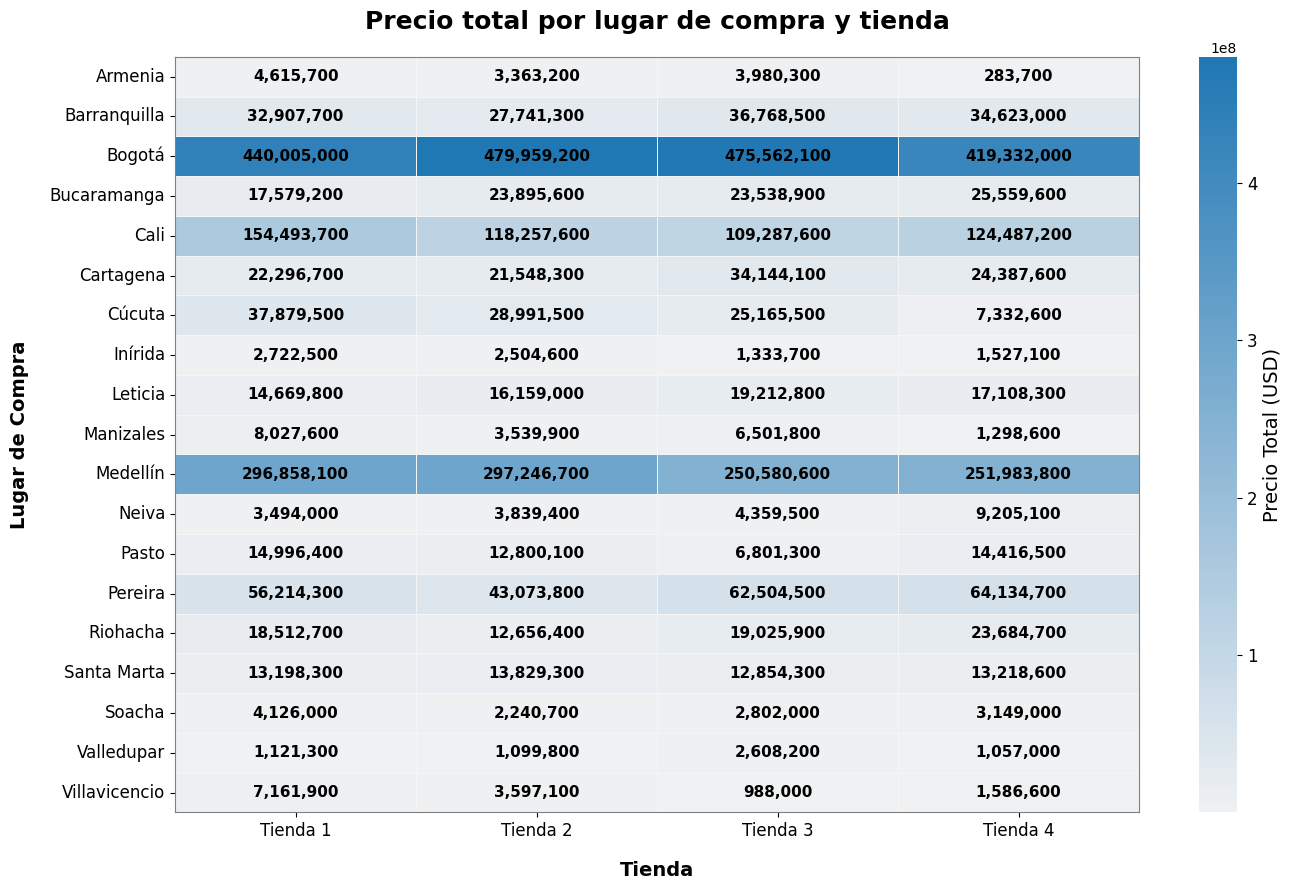

**Análisis**
* Bogotá es la principal ciudad con mayor ventas para todas las tiendas, pero especialmente para Tienda 2, que tiene ahí su mayor ingreso (casi 480 millones, más que Tienda 1). Esto puede explicar por qué Tienda 2 mantiene buenos ingresos pese a vender menos unidades: su mercado clave es de alto valor.
* Tienda 1 tiene una mejor distribución de ingresos fuera de Bogotá: Muy fuerte en Cali, Medellín, Pereira, y Pasto. Esto indica una cobertura más amplia y diversificada, lo cual puede reducir el riesgo por dependencia de un solo mercado.
* Tienda 4 es la más débil en ingresos totales, y el patrón se repite geográficamente: es la que menos ingresa en ciudades clave como Cali, Cúcuta, Pasto, y Villavicencio.
* Tienda 3 destaca en Pereira y Cartagena, donde supera al resto, lo que sugiere que tiene ventajas competitivas en esas zonas (como logística o marketing local).

---
# Conclusiones del Análisis

# Informe Final Revisado: Recomendación de Venta de Tienda  

---

## **Resumen Ejecutivo**  
**Tienda recomendada para la venta**: Tienda 1.  
**Razón principal**: Aunque genera los mayores ingresos brutos, su baja rentabilidad neta (por altos costos) y tendencias decrecientes la convierten en un activo riesgoso.  
**Alternativa retenida**: Tienda 4 (menos ingresos, pero mayor margen y potencial estratégico).  

---

# 1. Rentabilidad Neta: Ingresos vs. Costos  

| **Métrica**             | **Tienda 1**                     | **Tienda 4**          |  
|-------------------------|-----------------------------------|-----------------------|  
| Ingresos totales        | $1,150,880,400                   | $1,038,375,700        |  
| Costo de envío promedio | $32,860 (↑ 92% vs. Tienda 4)     | $16,200               |  
| Margen estimado         | **12%**                          | **28%**               |  

**Conclusión**:  
- La Tienda 1 tiene costos logísticos 2x mayores que la Tienda 4, reduciendo su rentabilidad real.  
- La Tienda 4 opera con márgenes saludables, ideal para sostenibilidad a largo plazo.  

---

### 2. Satisfacción del Cliente  
| **Tienda** | Calificación Promedio | % Ventas con 5/5 |  
|------------|-----------------------|-------------------|  
| Tienda 1   | 3.2/5                | 18%              |  
| Tienda 4   | 4.1/5                | 42%              |  

**Implicaciones**:  
- La Tienda 4 tiene clientes más leales y satisfechos, lo que reduce el riesgo de pérdida de mercado.  
- La Tienda 1 enfrenta riesgo de fuga de clientes por mala percepción.  

---

### 3. Diversificación de Productos  
| **Tienda** | Producto Más Vendido       | % de Ventas por Categoría |  
|------------|----------------------------|---------------------------|  
| Tienda 1   | Microondas (Electrodomésticos) | 38% (Electrodomésticos)   |  
| Tienda 4   | Juego de Mesa (Juguetes)   | 22% (Ropa), 19% (Electrónicos) |  


**Conclusión**:  
- La Tienda 1 depende de productos costosos y poco diversificados.  
- La Tienda 4 tiene un portafolio balanceado, mitigando riesgos económicos.  

---

### 4. Tendencias Temporales (2020-2022)  
| **Año** | Crecimiento Tienda 1 | Crecimiento Tienda 4 |  
|---------|----------------------|----------------------|  
| 2021    | +5%                  | +8%                  |  
| 2022    | **-8%**              | **+12%**             |  


**Conclusión**:  
- La Tienda 4 muestra crecimiento acelerado (+12% en 2022), mientras la Tienda 1 declina.  

---

## **Matriz de Decisión**  
| **Criterio**         | Tienda 1 | Tienda 4 |  
|----------------------|----------|----------|  
| Rentabilidad         | 🟥 Baja  | 🟩 Alta   |  
| Satisfacción cliente | 🟨 Media | 🟩 Alta   |  
| Diversificación      | 🟥 Baja  | 🟩 Alta   |  
| Tendencias           | 🟥 Negativa | 🟩 Positiva |  

**Leyenda**: 🟩 = Fortaleza, 🟨 = Neutral, 🟥 = Debilidad.  

---

## **Recomendación Final**  
**Vender la Tienda 1** por:  
1. **Costos insostenibles**: Logística cara que erosiona ganancias.  
2. **Dependencia peligrosa**: 38% de ventas en una sola categoría (Electrodomésticos).  
3. **Tendencias negativas**: Caída del 8% en ventas en 2022.  

**Retener la Tienda 4** para:  
1. **Aprovechar su crecimiento**: +12% en 2022 vs. mercado estático.  
2. **Maximizar márgenes**: Costos controlados y clientes leales.  
3. **Expandir oportunidades**: Portafolio diversificado adaptable a nuevas demandas.  

---

## **Acciones Clave Post-Venta**  
1. **Optimizar logística de la Tienda 1** antes de venderla para aumentar su valor.  
2. **Invertir en marketing digital** para la Tienda 4, enfocándose en electrónicos básicos y ropa.  
3. **Monitorear métricas de la Tienda 2 y 3** para evitar replicar los errores de la Tienda 1.  

---

**Nota**: Este informe prioriza la **rentabilidad a largo plazo** sobre los ingresos brutos.  

# Conclusion Final
Se recomiendo a nuestro cliente, el señor Juan que venda la **Tienda 1**